<a href="https://colab.research.google.com/github/RamaSiritha/Project/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sn
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
churn_data = pd.read_csv("/content/sample_data/Churn_Modelling.csv",encoding = "ISO-8859-1")
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
churn_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [4]:
churn_data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
churn_data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
churn_data.drop(['RowNumber', 'Surname'],axis=1)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


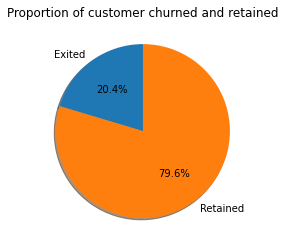

In [8]:
l = 'Exited', 'Retained'
sizes = [churn_data.Exited[churn_data['Exited']==1].count(), churn_data.Exited[churn_data['Exited']==0].count()]
plt.pie(sizes, labels=l, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.title("Proportion of customer churned and retained")
plt.show()

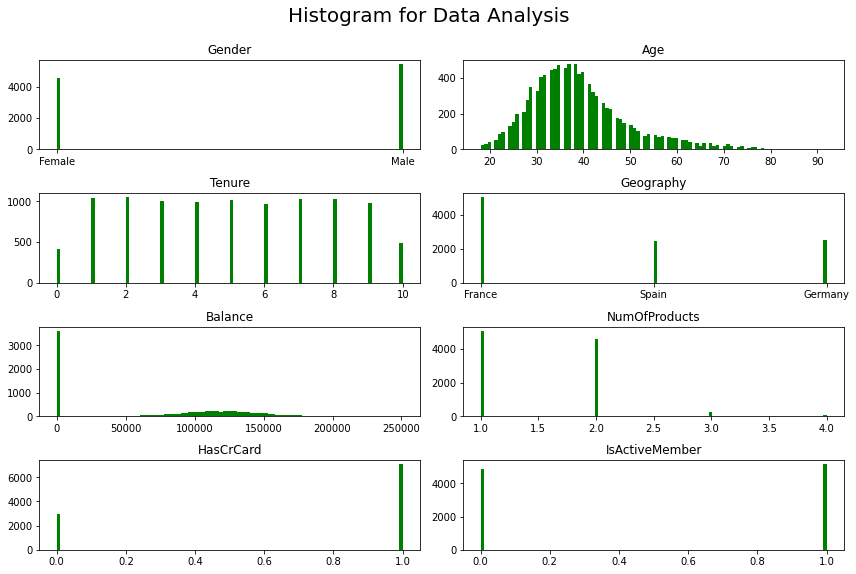

In [9]:
d= churn_data[['Gender','Age', 'Tenure', 'Geography', 'Balance', 'NumOfProducts', 'HasCrCard','IsActiveMember']]

chart= plt.figure(figsize=(12,12))
plt.suptitle("Histogram for Data Analysis\n", horizontalalignment="center", fontstyle="normal", fontsize = 20)
for i in range(d.shape[1]):
  plt.subplot(6,2,i+1)
  f=plt.gca()
  f.set_title(d.columns.values[i])
  val=np.size(d.iloc[:,i])
  if(val>100):
    val=100
  
  plt.hist(d.iloc[:,i], bins=val, color='green')
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])

Observations:

Gender- Both male and female are almost equal, we have a bit more number
of records in the dataset that are males.

Age-Most of the customers are in between the age 30 to 40.

Tenure-The tenure mostly isfrom 1 yr to 9 yrs.

Geography- Most of the customers in the dataset are from france, then 
spain and germany.

Balance- Most of the customers are having less balance, and some have 
between 1000000 to 150000.

Num of products- Most of the customers have 1 or 2 products

Has credit card-The customers having credit card are more than the no.

Is Active member- The customers who are active and not active are almost
equal.


Text(0.5, 1.0, 'Number of people exited according to Gender Column')

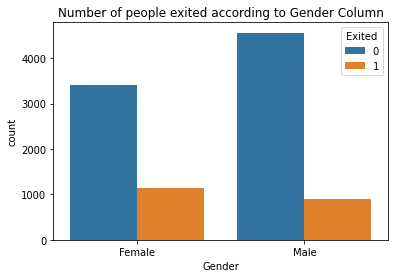

In [10]:
sn.countplot(x='Gender', hue = 'Exited', data = churn_data).set_title('Number of people exited according to Gender Column')

Text(0.5, 1.0, 'Number of people exited according to Age Column')

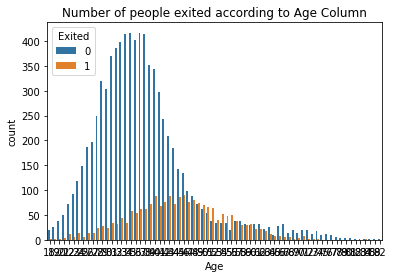

In [11]:
sn.countplot(x='Age', hue = 'Exited', data = churn_data).set_title('Number of people exited according to Age Column')

Text(0.5, 1.0, 'Number of people exited according to Tenure Column')

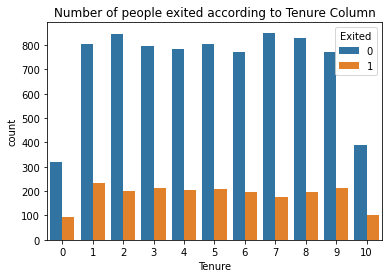

In [12]:
sn.countplot(x='Tenure', hue = 'Exited', data = churn_data).set_title('Number of people exited according to Tenure Column')

Text(0.5, 1.0, 'Number of people exited according to Geography Column')

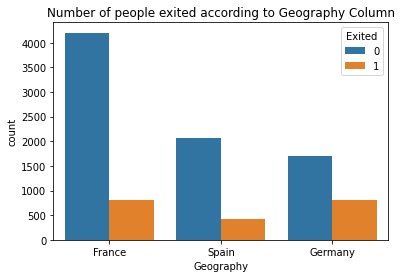

In [13]:
sn.countplot(x='Geography', hue = 'Exited', data = churn_data).set_title('Number of people exited according to Geography Column')

Text(0.5, 1.0, 'Number of people exited according to NumofProducts Column')

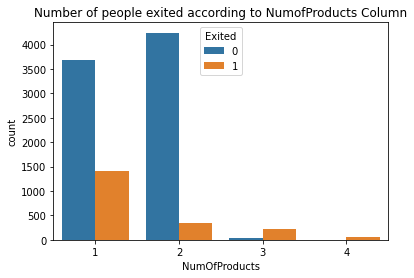

In [14]:
sn.countplot(x='NumOfProducts', hue = 'Exited', data = churn_data).set_title('Number of people exited according to NumofProducts Column')

Text(0.5, 1.0, 'Number of people exited according to HasCrCard Column')

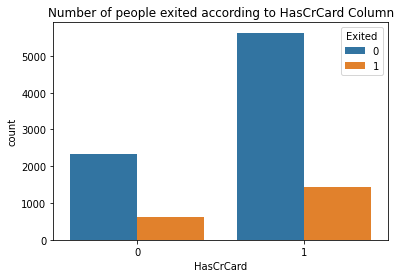

In [15]:
sn.countplot(x='HasCrCard', hue = 'Exited', data = churn_data).set_title('Number of people exited according to HasCrCard Column')

Text(0.5, 1.0, 'Number of people exited according to IsActiveMember Column')

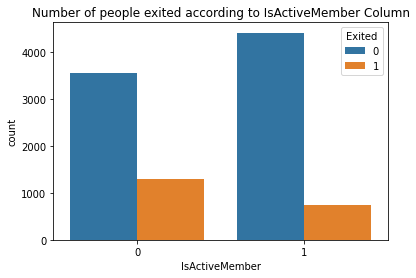

In [16]:
sn.countplot(x='IsActiveMember', hue = 'Exited', data = churn_data).set_title('Number of people exited according to IsActiveMember Column')

Observations from the analysis done on number of people exited and retained:

Number of people exited are greater in females.

Number of people exited are higher in between the age 38-45.

Number of people exited are mostly equal from 1 yr to 9 yrs.

Number of people exited are greater in France and Germany, then in Spain.

Number of people exited are greater who have only 1 product.

Number of people exited are greater in people having credit cards.

Number of people exited are greater who are not much active.

In [19]:
for column in churn_data.columns:
    if churn_data[column].dtype == type(object):
        le = sklearn.preprocessing.LabelEncoder()
        churn_data[column] = le.fit_transform(churn_data[column])

In [20]:
churn_data.dtypes

RowNumber            int64
CustomerId           int64
Surname              int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object